<a href="https://colab.research.google.com/github/suryamandavilli/COVID-19/blob/master/COVID_19_JHU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
import plotly.graph_objects as go

In [0]:
import plotly.express as px

In [0]:
con_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
dt_df = pd.read_csv('time_series_covid19_deaths_global.csv')
rc_df = pd.read_csv('time_series_covid19_recovered_global.csv')
cou_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [0]:
print(con_df.shape)

In [0]:
print(dt_df.shape)

In [0]:
print(rc_df.shape)

In [0]:
con_df.columns

In [0]:
dt_df.columns

In [0]:
rc_df.columns

In [0]:
cou_df.columns

In [0]:
for col in con_df.columns:
  print(col)

In [0]:
for col in cou_df.columns:
  print(col)

In [0]:
global_data = cou_df.copy().drop(['Lat','Long_','Last_Update','Country_Region'], axis=1)
global_summary = pd.DataFrame(global_data.sum()).transpose()
global_summary.style.format("{:,.0f}")

In [0]:
con_df_ts = con_df.copy().drop(['Lat','Long','Province/State','Country/Region'], axis=1)
con_df_ts_summary = con_df_ts.sum()
con_df_ts_summary

In [0]:
fig = go.Figure(data=go.Scatter(x=con_df_ts_summary.index, y = con_df_ts_summary.values, 
                                mode='lines+markers'))
fig.update_layout(title='Total Coronavirus Confirmed Cases (Globally)',
                                  yaxis_title='Confirmed Cases', xaxis_tickangle = 315 )
fig.show()

In [0]:
new_con_df = con_df.copy().drop(['Lat','Long','Province/State','Country/Region'], axis=1).sum()
new_dt_df = dt_df.copy().drop(['Lat','Long','Province/State','Country/Region'], axis=1).sum()
new_rc_df = rc_df.copy().drop(['Lat','Long','Province/State','Country/Region'], axis=1).sum()

#There is no timeseries data for Active cases, therefore it needs to be engineered separately
active_agg_ts = pd.Series(data=np.array([xl - x2 - x3 for (xl, x2, x3) 
                            in zip(new_con_df.values,new_dt_df.values, new_rc_df.values)]),index = new_con_df.index)

In [0]:
def draw_plot(ts_array, ts_label, title, colors, mode_size, line_size, x_axis_title , y_axis_title, tickangle = 0, yaxis_type = "", additional_annotations=[]):
    # initialize figure
    fig = go.Figure()
    # add all traces
    for index, ts in enumerate(ts_array):
        fig.add_trace(go.Scatter(x=ts.index,
                                 y = ts.values,
                                 name = ts_label[index],
                                 line=dict(color=colors[index], width=line_size[index]),connectgaps=True,))
    # base x_axis prop.
    x_axis_dict = dict(showline=True, 
                       showgrid=True, 
                       showticklabels=True, 
                       linecolor='rgb(204, 204, 204)', 
                       linewidth=2,
                       ticks='outside',
                       tickfont=dict(family='Arial',size=12,color='rgb(82, 82, 82)',))
    # setting x_axis params
    if x_axis_title:
        x_axis_dict['title'] = x_axis_title
    
    if tickangle > 0:
        x_axis_dict['tickangle'] = tickangle
    
    # base y_axis prop.
    y_axis_dict = dict(showline = True,
                       showgrid = True,
                       showticklabels=True,
                       linecolor='rgb(204, 204, 204)',
                       linewidth=2,)
    # setting y_axis params
    if yaxis_type != "":
        y_axis_dict['type'] = yaxis_type
    
    if y_axis_title:
        y_axis_dict['title'] = y_axis_title
        
#     # uncomment legend if you want to move the legend around
#     legend= dict(x=1,
#                  y=1,
#                  traceorder="normal",
#                  font=dict(family="sans-serif",size=12,color="black"),
#                  bgcolor="LightSteelBlue",
#                  bordercolor="Black",
#                  borderwidth=2)

#updating the layout
    fig.update_layout(xaxis = x_axis_dict,
                      yaxis = y_axis_dict,
                      autosize=True,
                      margin=dict(autoexpand=False,l=100,r=20,t=110,),
                      showlegend=True,
#                       legend = legend
                     )

    # base annotations for any graph
    annotations = []
    # Title
    annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05, xanchor='left', yanchor='bottom',
                                  text=title,
                                  font=dict(family='Arial',size=16,color='rgb(37,37,37)'),showarrow=False))
    # adding annotations in params
    if len(additional_annotations) > 0:
        annotations.append(additional_annotations)
    
    #updating the layout
    fig.update_layout(annotations=annotations)

    return fig

In [0]:
new_con_df = con_df.copy().drop(['Lat','Long','Province/State','Country/Region'], axis=1).sum()
new_dt_df = dt_df.copy().drop(['Lat','Long','Province/State','Country/Region'], axis=1).sum()
new_rc_df = rc_df.copy().drop(['Lat','Long','Province/State','Country/Region'], axis=1).sum()

#There is no timeseries data for Active cases, therefore it needs to be engineered separately
active_agg_ts = pd.Series(data=np.array([xl - x2 - x3 for (xl, x2, x3) 
                            in zip(new_con_df.values,new_dt_df.values, new_rc_df.values)]),index = new_con_df.index)

In [79]:
color_arr = px.colors.qualitative.Dark24
ts_array = [new_con_df, active_agg_ts, new_rc_df, new_dt_df]
labels = ['Confirmed', 'Active', 'Recovered', 'Deaths']
colors = [color_arr[5],  color_arr[0], color_arr[2], color_arr[3]]
mode_size = [8, 8, 12, 8]
line_size = [2, 2, 4, 2]

# Calling the draw_plot function defined above
fig_2 = draw_plot(ts_array = ts_array, 
                  ts_label = labels , 
                  title = "Covid-19 Case Status(22nd Jan to Last Updated)",
                  colors = colors, mode_size = mode_size, 
                  line_size = line_size , 
                  x_axis_title = "Date" , 
                  y_axis_title = "Case Count", 
                  tickangle = 315, 
                  yaxis_type = "", additional_annotations=[])

fig_2.show()

In [0]:
cou_df.copy().drop(
    ['Lat','Long_','Last_Update'],axis =1).sort_values('Confirmed', ascending= False).reset_index(drop=True).style.bar(
    align="left",width=98,color='#d65f5f')

In [0]:


con_India_ts = con_df[con_df['Country/Region']=="India"]
con_India_ts = con_India_ts.drop(
    ['Lat','Long','Country/Region','Province/State'],axis =1).reset_index(drop=True).sum()

dt_India_ts = dt_df[dt_df['Country/Region']=="India"]
dt_India_ts = dt_India_ts.drop(
    ['Lat','Long','Country/Region','Province/State'],axis =1).reset_index(drop=True).sum()

rc_India_ts = rc_df[rc_df['Country/Region']=="India"]
rc_India_ts = rc_India_ts.drop(
    ['Lat','Long','Country/Region','Province/State'],axis =1).reset_index(drop=True).sum()

active_India_ts = pd.Series(
    data=np.array(
        [x1 - x2 - x3  for (x1, x2, x3) in zip(
            con_India_ts.values,dt_India_ts.values, rc_India_ts.values)
        ] 
    ), 
    index= con_India_ts.index
)

In [0]:
ts_array = [con_India_ts, active_India_ts, rc_India_ts, dt_India_ts]
labels = ['Confirmed', 'Active', 'Recovered', 'Deaths']
colors = [color_arr[5],  color_arr[0], color_arr[2], color_arr[3]]
mode_size = [8, 8, 12, 8]
line_size = [2, 2, 4, 2]

# Calling the draw_plot function defined above
fig_3 = draw_plot(ts_array = ts_array, 
                  ts_label = labels , 
                  title = "Covid-19 Case Trend in INDIA",
                  colors = colors, mode_size = mode_size, 
                  line_size = line_size , 
                  x_axis_title = "Date" , 
                  y_axis_title = "Case Count", 
                  tickangle = 315, 
                  yaxis_type = "", additional_annotations=[])

fig_3.show()

In [0]:
#Transmission in India from 
ts_array = [con_India_ts[52:], active_India_ts[52:], rc_India_ts[52:], dt_India_ts[52:]]
fig_4 = draw_plot(ts_array = ts_array, 
                  ts_label = labels , 
                  title = "Covid-19 Transmission Timeline in INDIA - 14/03/2020 Onwards",
                  colors = colors, mode_size = mode_size, 
                  line_size = line_size , 
                  x_axis_title = "Date" , 
                  y_axis_title = "Case Count", 
                  tickangle = 315, 
                  yaxis_type = "", additional_annotations=[])

fig_4.show()

**Inference**

As we see, there is a sharp upturn in cases from May 01, 2020. This means the Lockdown 2.0 which was announced on Apr 15 has led to less physical distancing, letting people to come out has hampered the public health situation in the country. The situations got worse from then and on 29th May, 2020 the country has got double the number of cases it usually got hitherto. The Unlock 1.0 is showing the worst results as more and more people are getting infected.

# SIR Model

In [0]:
# Imports required
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime

In [0]:
START_DATE = {
  'Italy': '1/31/20',
  'India': '1/30/20'
}
class Learner(object):
    def __init__(self, country, loss, start_date ='1/22/20', predict_range=150,s_0=100000, i_0=2, r_0=10):
        self.country = country
        self.loss = loss
        self.start_date = start_date
        self.predict_range = predict_range
        self.s_0 = s_0
        self.i_0 = i_0
        self.r_0 = r_0

    def load_confirmed(self, country):
        df = pd.read_csv('time_series_covid19_confirmed_global.csv')
        df = df.drop(['Province/State'],axis =1)
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]


    def load_recovered(self, country):
        df = pd.read_csv('time_series_covid19_recovered_global.csv')
        df = df.drop(['Province/State'],axis =1)
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]


    def load_dead(self, country):
        df = pd.read_csv('time_series_covid19_deaths_global.csv')
        df = df.drop(['Province/State'],axis =1)
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]
    

    def extend_index(self, index, new_size):
        values = index.values
        current = datetime.strptime(index[-1], '%m/%d/%y')
        while len(values) < new_size:
            current = current + timedelta(days=1)
            values = np.append(values, datetime.strftime(current, '%m/%d/%y'))
        return values

    def predict(self, beta, gamma, data, recovered, death, country, s_0, i_0, r_0):
        """
        Predict how the number of people in each compartment can be changed through time toward the future.
        The model is formulated with the given beta and gamma.
        """
        new_index = self.extend_index(data.index, self.predict_range)
        size = len(new_index)
        def SIR(t, y):
            S = y[0]
            I = y[1]
            R = y[2]
            return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
        extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
        extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
        extended_death = np.concatenate((death.values, [None] * (size - len(death.values))))
        return new_index, extended_actual, extended_recovered, extended_death, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))
    
    def train(self):
        """
        Run the optimization to estimate the beta and gamma fitting the given confirmed cases.
        """
        recovered = self.load_recovered(self.country)
        death = self.load_dead(self.country)
        data = (self.load_confirmed(self.country) - recovered - death)
        
        optimal = minimize(
            loss, 
            [0.001, 0.001], 
            args=(data, recovered, self.s_0, self.i_0, self.r_0), 
            method='L-BFGS-B', 
            bounds=[(0.00000001, 0.4), (0.00000001, 0.4)]
        )
        print(optimal)
        beta, gamma = optimal.x
        new_index, extended_actual, extended_recovered, extended_death, prediction = self.predict(beta, gamma, data, recovered, death, self.country, self.s_0, self.i_0, self.r_0)
        df = pd.DataFrame({'Infected data': extended_actual, 'Recovered data': extended_recovered, 'Death data': extended_death, 'Susceptible': prediction.y[0], 'Infected': prediction.y[1], 'Recovered': prediction.y[2]}, index=new_index)
        df.to_csv(f"{self.country}.csv")
        fig, ax = plt.subplots(figsize=(15, 10))
        ax.set_title(self.country)
        df.plot(ax=ax)
        print(f"country={self.country}, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
        fig.savefig(f"{self.country}.png")
        
        return df, fig

In [0]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [0]:
italy_learner = Learner(country="Italy", loss= loss )

In [0]:
italy_df, italy_fig = italy_learner.train()

In [0]:
# SIR Model for India
india_learner = Learner(country="India", loss= loss, i_0= 3)

      fun: 19706.177943906016
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.49012037e+09, -4.33231398e+03])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 291
      nit: 18
   status: 0
  success: True
        x: array([1.50177545e-06, 4.30578542e-02])
country=India, beta=0.00000150, gamma=0.04305785, r_0:0.00003488


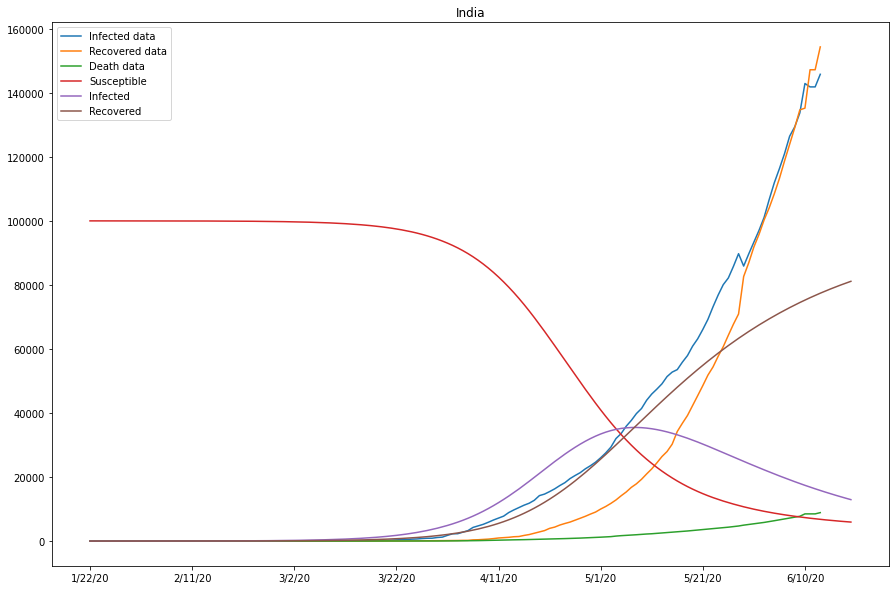

In [73]:
india_sir , india_sir_fig = india_learner.train()

In [0]:
india_sir = india_sir[:]

In [0]:
def plot_sir_prediction(title, df_sir, remove_series=[],yaxis_type="", yaxis_title=""):
    fig = go.Figure()
    title = title
    labels = ['Infected data','Recovered data', 'Death data', 'Susceptible','Infected','Recovered']
    colors = [color_arr[0], color_arr[8], color_arr[2], color_arr[3],color_arr[7], color_arr[16]]
    line_size = [2, 2, 2, 2, 2, 2]
    
    for index, data_series in enumerate(labels):
        if data_series not in remove_series:
            fig.add_trace(go.Scatter(x=df_sir.index, 
                                           y = df_sir[data_series], 
                                           name = labels[index],
                                           line=dict(
                                               color=colors[index], 
                                               width=line_size[index]),
                                           connectgaps=True,))
    xaxis= dict(
        title = "Date",
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickangle = 280,
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',),)
    yaxis = dict(
        title = "Case Count",
        showline = True,
        showgrid = True,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,)
    
    if yaxis_type!="":
        yaxis['type'] = yaxis_type
    
    if yaxis_title !="":
        yaxis['title'] = yaxis_title
    
    fig.update_layout(
        xaxis = xaxis,
        yaxis = yaxis,
        autosize=True,
        margin=dict(autoexpand=True,l=100,r=20,t=110,),
        showlegend=True)

    annotations = []

    # Title
    annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text=title,
                              font=dict(family='Arial',
                                        size=16,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

    fig.update_layout(annotations=annotations)
    return fig

In [78]:
fig_8 = plot_sir_prediction(title="SIR Model --  Covid-19 Transmission -- Prediction -- INDIA", df_sir= india_sir)
fig_8.show()

In [76]:
fig_8 = plot_sir_prediction(
    title="SIR Model --  Covid-19 Transmission -- Prediction -- INDIA", 
    df_sir= india_sir,
    remove_series=['Susceptible'])

fig_8.show()

In [77]:
#Log Scale
fig_9 = plot_sir_prediction(
    title="SIR Model --  Covid-19 Transmission -- Prediction -- INDIA", 
    df_sir= india_sir,
    remove_series=['Susceptible'],
    yaxis_type="log",
    yaxis_title="Case Count (Log Scale)")

fig_9.show()